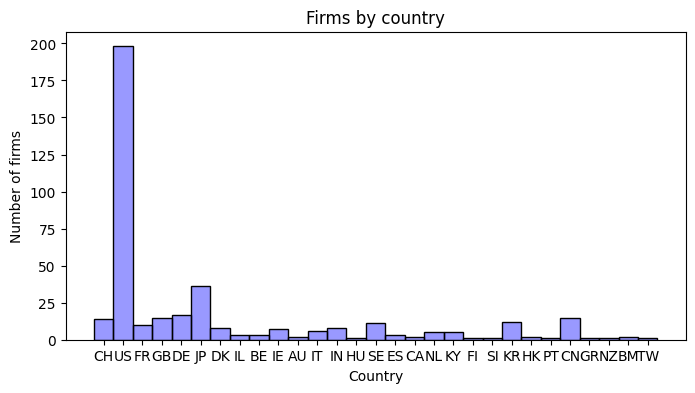

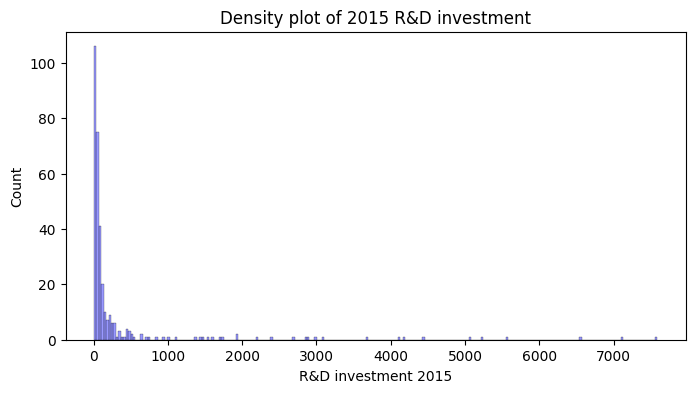

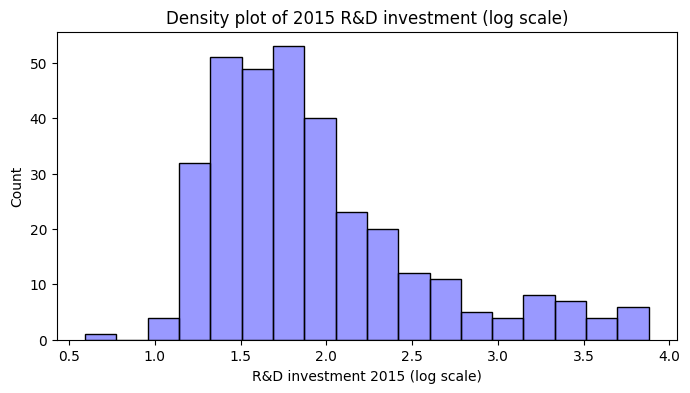

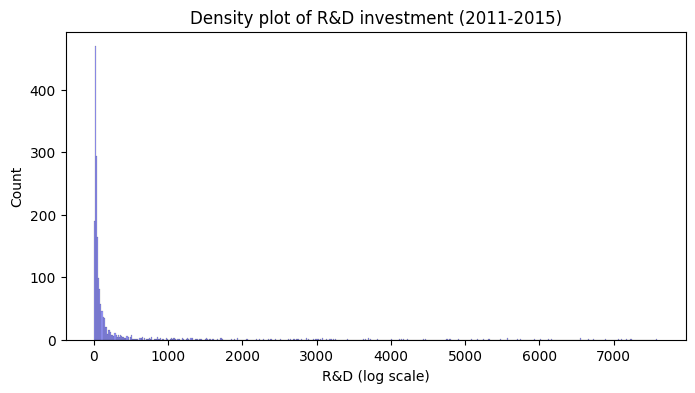

c:\Users\David Eggleton\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\David Eggleton\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\David Eggleton\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\David Eggleton\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\David Eggleton\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density

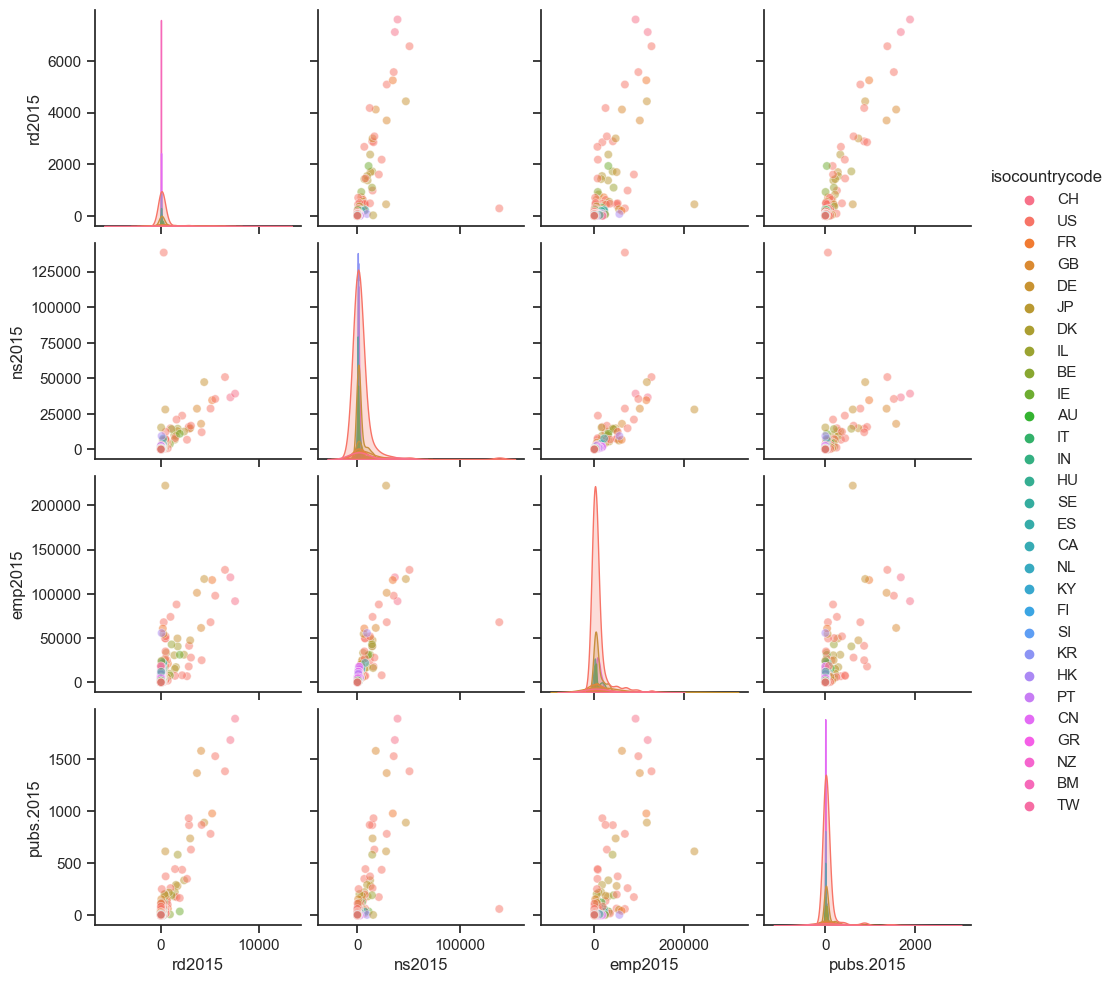

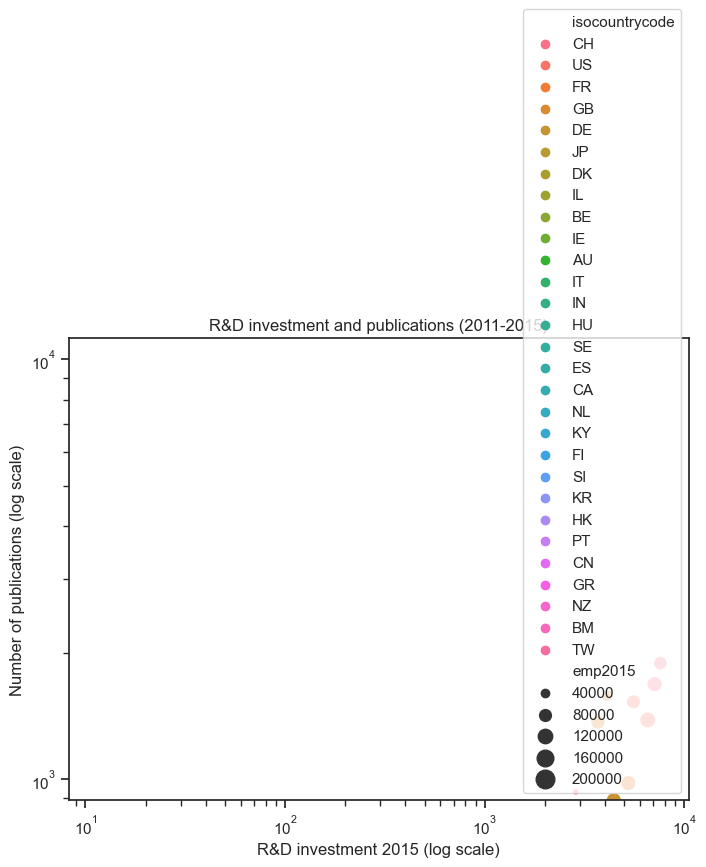

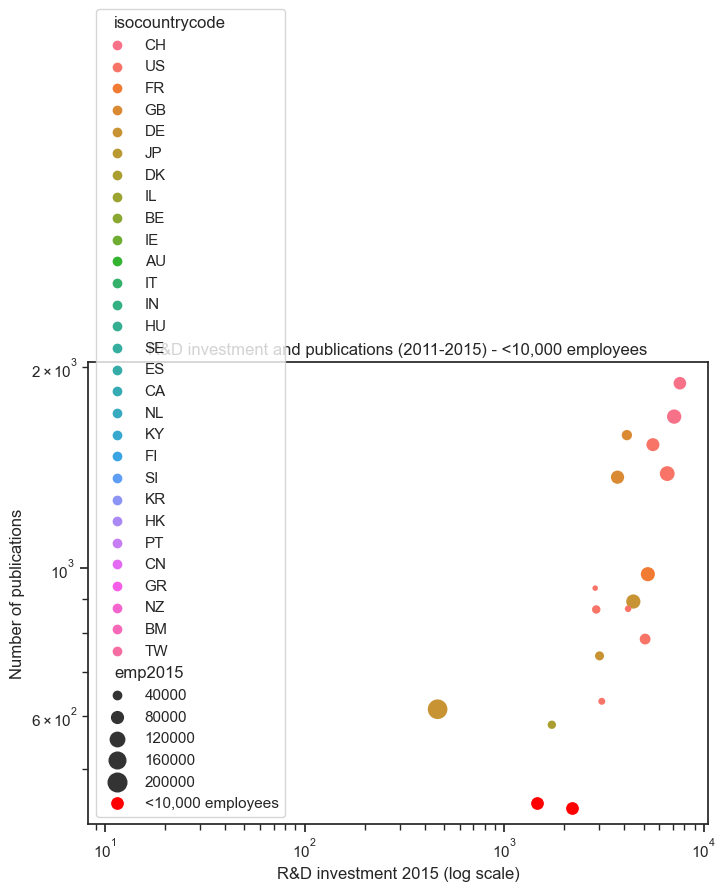

ModuleNotFoundError: No module named 'plotnine'

In [1]:
# Objectives
# + To familiarize with `ggplot` (we will use a dataset on firms' publishing activity and R&D expenditures)
# + To explore a few network layout algorithms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Load the data
my_data = pd.read_csv("scoreboard_firms_pharma_healthcare.csv")

# Examine the distribution of firms by country
plt.figure(figsize=(8, 4))
sns.histplot(data=my_data, x="isocountrycode", color="blue", alpha=0.4)
plt.title("Firms by country")
plt.xlabel("Country")
plt.ylabel("Number of firms")
plt.show()

# Explore the distribution of R&D investment in 2015
plt.figure(figsize=(8, 4))
sns.histplot(data=my_data, x="rd2015", color="blue", alpha=0.4)
plt.title("Density plot of 2015 R&D investment")
plt.xlabel("R&D investment 2015")
plt.show()

# Transform R&D investment using the log function
plt.figure(figsize=(8, 4))
sns.histplot(data=my_data, x=np.log10(my_data["rd2015"]), color="blue", alpha=0.4)
plt.title("Density plot of 2015 R&D investment (log scale)")
plt.xlabel("R&D investment 2015 (log scale)")
plt.show()

# Exercise 1: Reproduce the density plot for the variable `pubs.2015`

# Transform the data into a tidy format for exploration
columns = ["rd2011", "rd2012", "rd2013", "rd2014", "rd2015"]
rd_data = my_data[["ID"] + columns]
rd_data = rd_data.melt(id_vars="ID", var_name="year", value_name="rd")

plt.figure(figsize=(8, 4))
sns.histplot(data=rd_data, x="rd", color="blue", alpha=0.4)
plt.title("Density plot of R&D investment (2011-2015)")
plt.xlabel("R&D (log scale)")
plt.show()

# Explore relationships between variables using GGally
sns.set(style="ticks")
sns.pairplot(data=my_data, vars=["rd2015", "ns2015", "emp2015", "pubs.2015"], hue="isocountrycode", plot_kws={"alpha": 0.5})
plt.show()

# Focus on the relationship between R&D investment and publications activity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=my_data, x="rd2015", y="pubs.2015", hue="isocountrycode", size="emp2015", sizes=(0, 200))
plt.xscale("log")
plt.yscale("log")
plt.title("R&D investment and publications (2011-2015)")
plt.xlabel("R&D investment 2015 (log scale)")
plt.ylabel("Number of publications (log scale)")
plt.legend(loc="lower right")
plt.show()

# Use gghighlight to identify firms with less than 10,000 employees
plt.figure(figsize=(8, 6))
sns.scatterplot(data=my_data, x="rd2015", y="pubs.2015", hue="isocountrycode", size="emp2015", sizes=(0, 200))
plt.xscale("log")
plt.yscale("log")
plt.title("R&D investment and publications (2011-2015) - <10,000 employees")
plt.xlabel("R&D investment 2015 (log scale)")
plt.ylabel("Number of publications")
plt.legend(loc="lower right")
sns.scatterplot(data=my_data[my_data["emp2015"] < 10000], x="rd2015", y="pubs.2015", color="red", s=100, label="<10,000 employees")
plt.show()

# Exercise 2: Reproduce scatterplots for firms with 10,000-50,000 employees and >50,000 employees

# Combine all charts using the patchwork package
from plotnine import ggplot, geom_point, scale_x_log10, scale_y_log10, ggtitle, xlab, ylab, theme, element_text, theme_void
from plotnine.facets import facet_wrap

g1 = ggplot(my_data_tidy, aes(x="rd", y="pubs+1")) + \
    geom_point(aes(color="country", size="emp")) + \
    scale_size(range=(0, 3)) + \
    geom_smooth() + \
    scale_x_log10() + \
    scale_y_log10() + \
    ggtitle("R&D investment and number of publications (2011-2015)") + \
    xlab("R&D (log scale)") + \
    ylab("Number of publications") + \
    theme(legend_position="bottom")

g2 = g1 + \
    theme(legend_position="none", plot_title=element_text(size=7)) + \
    ggtitle("<10,000 employees") + \
    facet_wrap("~year")

g1 / (g2 + theme_void()) + g1 + g2
